# This file was used to gain insight into the data, find correlations and multicolienarity between data points, etc

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error

In [3]:
dataset = pd.read_csv("body_fat_data.csv", index_col=0)

In [4]:
features = ['Neck circumference (cm)','Chest circumference (cm)','Abdomen circumference (cm)', 'Hip circumference (cm)',
        'Thigh circumference (cm)', 'Knee circumference (cm)', 'Ankle circumference (cm)',
        'Extended biceps circumference (cm)', 'Forearm circumference (cm)', 
            'Wrist circumference (cm)', 'Density gm/cm^3', 'Age', 'Weight (lbs)',
            'Height (inches)', 'Adiposity index = Weight/Height^2 (kg/m^2)', 
            'Fat Free Weight (1 - fraction of body fat) * Weight, using Brozek formula (lbs)']
features_short = ['Neck','Chest','Abdomen', 'Hip',
        'Thigh', 'Knee', 'Ankle ',
        'Extended biceps', 'Forearm', 
            'Wrist', 'Density gm/cm^3', 'Age', 'Weight (lbs)',
            'Height (inches)', 'Adiposity index', 
            'Fat Free Weight']
target = 'Percent body fat using Siri equation 495/Density'

### Correlation matrix

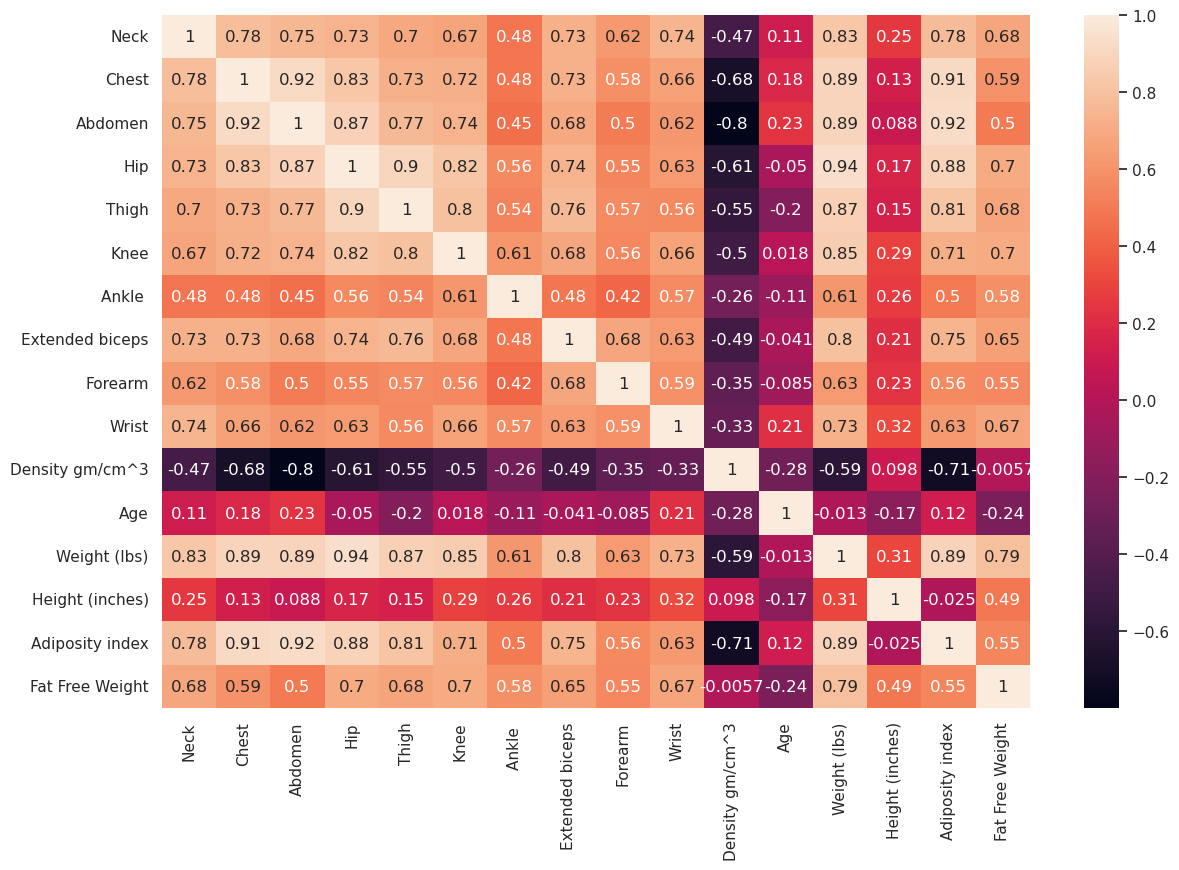

In [5]:
df = dataset[features]


df.columns = features_short
sn.set(rc={'figure.figsize':(14,9)})
sn.heatmap(df.corr(), annot=True)
plt.show()

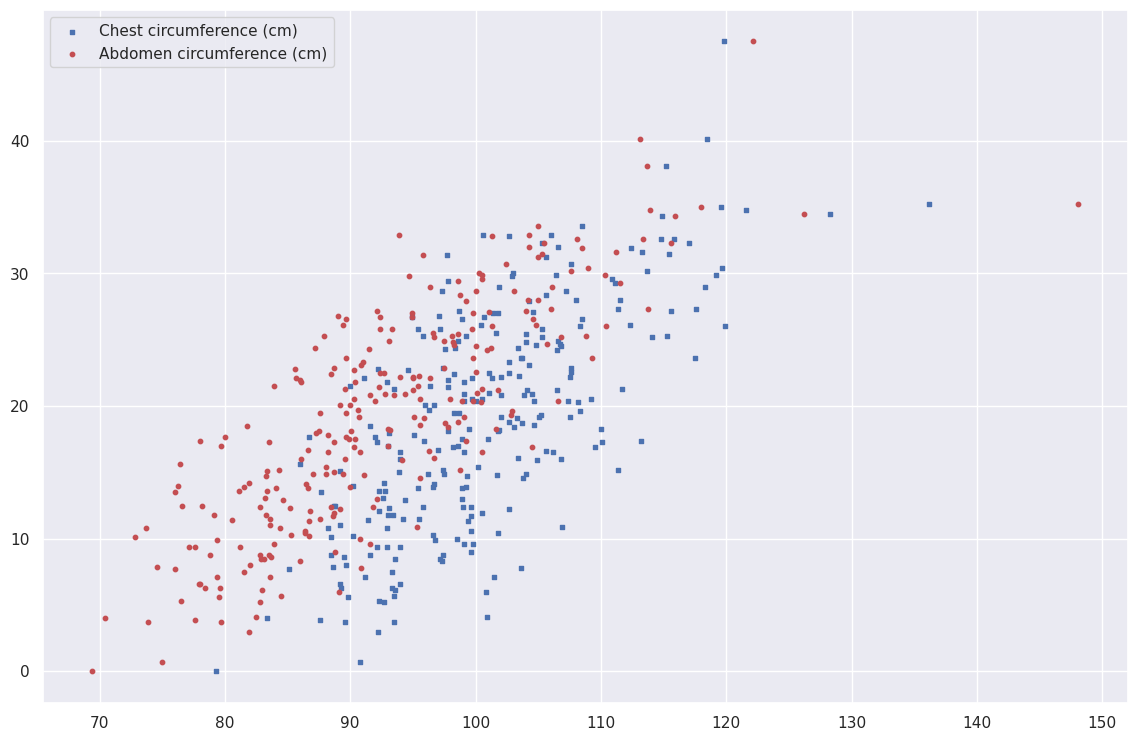

In [6]:


fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(dataset[['Chest circumference (cm)']], dataset[target], s=10, c='b', marker="s", label='Chest circumference (cm)')
ax1.scatter(dataset[['Abdomen circumference (cm)']], dataset[target], s=10, c='r', marker="o", label='Abdomen circumference (cm)')
plt.legend(loc='upper left')
plt.show()

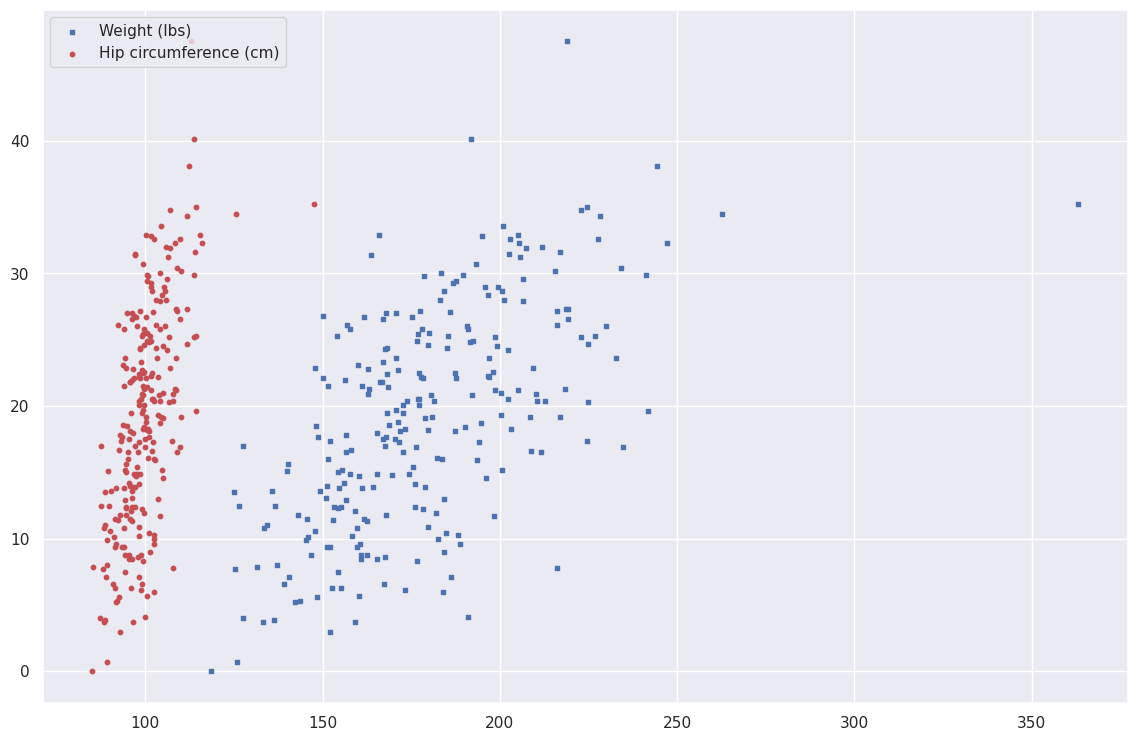

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(dataset[['Weight (lbs)']], dataset[target], s=10, c='b', marker="s", label='Weight (lbs)')
ax1.scatter(dataset[['Hip circumference (cm)']], dataset[target], s=10, c='r', marker="o", label='Hip circumference (cm)')
plt.legend(loc='upper left')
plt.show()

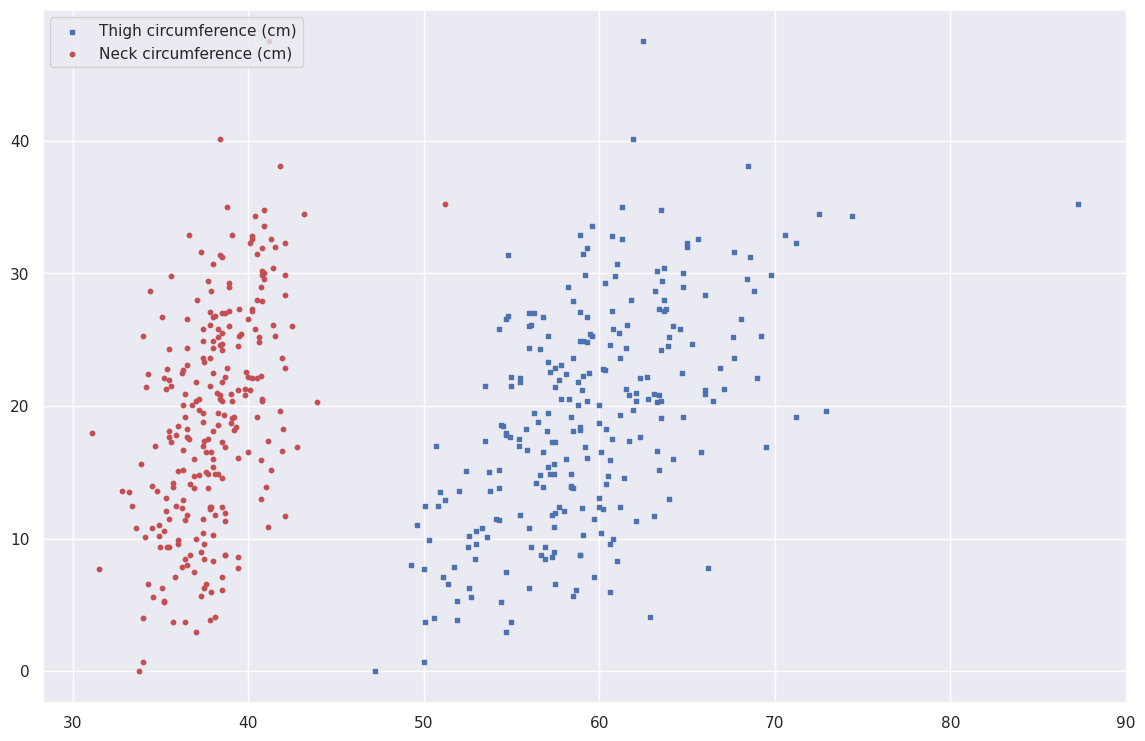

In [8]:


fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(dataset[['Thigh circumference (cm)']], dataset[target], s=10, c='b', marker="s", label='Thigh circumference (cm)')
ax1.scatter(dataset[['Neck circumference (cm)']], dataset[target], s=10, c='r', marker="o", label='Neck circumference (cm)')
plt.legend(loc='upper left')
plt.show()

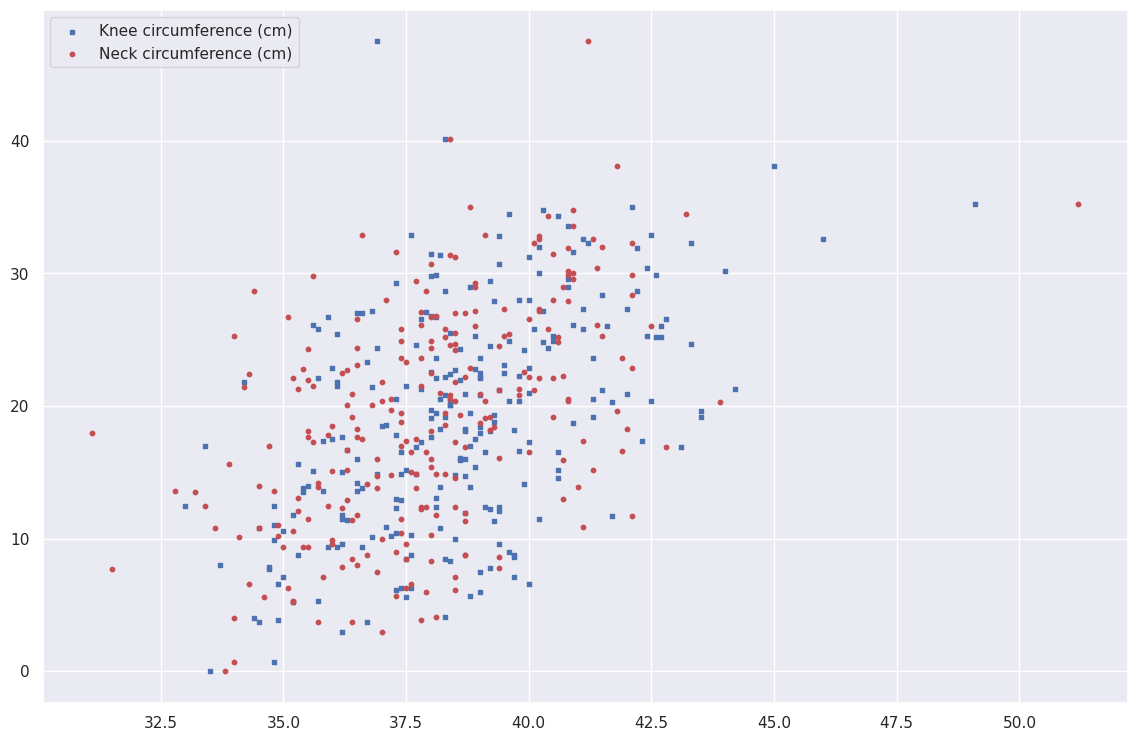

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(dataset[['Knee circumference (cm)']], dataset[target], s=10, c='b', marker="s", label='Knee circumference (cm)')
ax1.scatter(dataset[['Neck circumference (cm)']], dataset[target], s=10, c='r', marker="o", label='Neck circumference (cm)')
plt.legend(loc='upper left')
plt.show()

In [10]:
def normalize(data, maxv,minv):
    return (data- minv) / (maxv + minv)

## squared mean difference of each feature

In [11]:
x = dataset[[features[0]]].mean()

z=dataset['Knee circumference (cm)'].mean()

z - x


cor = 200

top_cors = {}
for feat in features:
    for feat1 in features:
        if (feat1 != feat): 
            curr_cor = (dataset[feat1].mean() - dataset[feat].mean())**2
            top_cors[str(feat) + "," + str(feat1)] = curr_cor
            


{k: v for k, v in sorted(top_cors.items(), key=lambda item: item[1]) if v < 10}

{'Neck circumference (cm),Knee circumference (cm)': 0.35809775762163903,
 'Knee circumference (cm),Neck circumference (cm)': 0.35809775762163903,
 'Chest circumference (cm),Hip circumference (cm)': 0.8453780864199226,
 'Hip circumference (cm),Chest circumference (cm)': 0.8453780864199226,
 'Ankle circumference (cm),Adiposity index = Weight/Height^2 (kg/m^2)': 5.4500014172335565,
 'Adiposity index = Weight/Height^2 (kg/m^2),Ankle circumference (cm)': 5.4500014172335565}

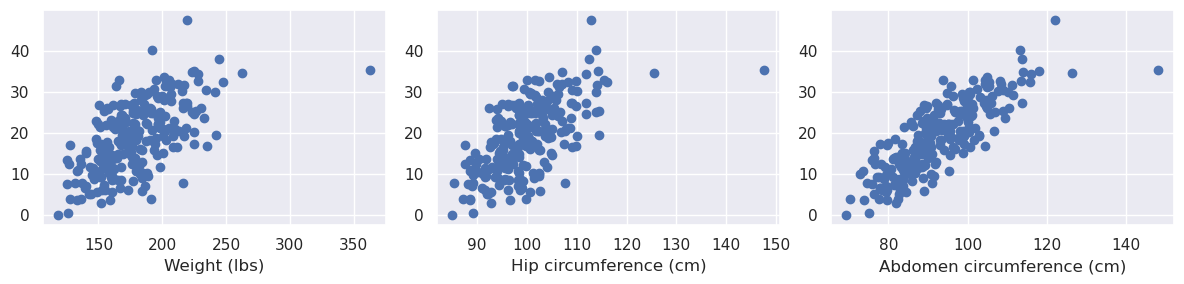

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
ax[0].scatter(dataset['Weight (lbs)'], dataset[target])
ax[0].set_xlabel('Weight (lbs)')
ax[1].scatter(dataset['Hip circumference (cm)'], dataset[target])
ax[1].set_xlabel('Hip circumference (cm)')
ax[2].scatter(dataset['Abdomen circumference (cm)'], dataset[target])
ax[2].set_xlabel('Abdomen circumference (cm)')
fig.tight_layout()

### Pearson's correlation coefficient

<function matplotlib.pyplot.show(close=None, block=None)>

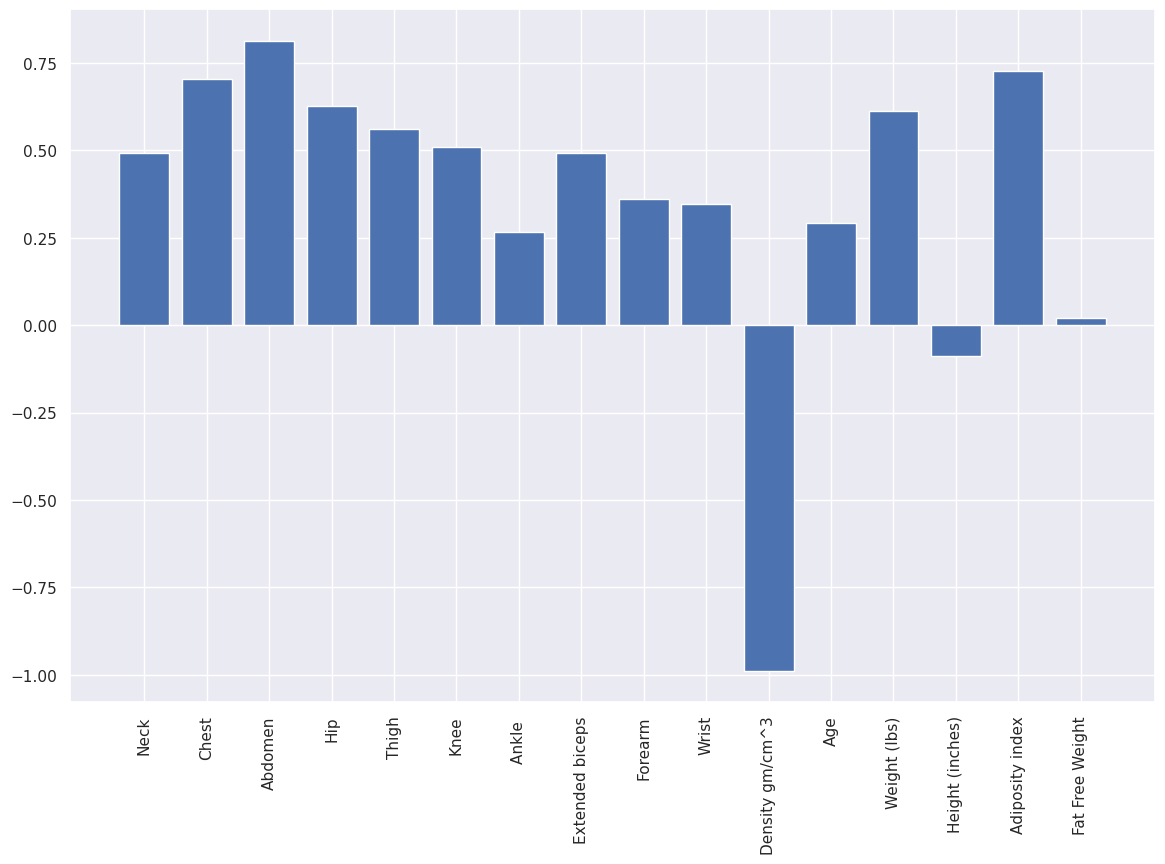

In [13]:


corr = {}
for i in features:
    my_rho = np.corrcoef(dataset[i], dataset[target])
    
    if (i == 'Fat Free Weight (1 - fraction of body fat) * Weight, using Brozek formula (lbs)'):
        i = 'Fat free weight'
    if (i == 'Adiposity index = Weight/Height^2 (kg/m^2)'):
        i = 'Adiposity'
    corr[i] = my_rho[1][0]
    


plt.bar(features_short, corr.values())
plt.xticks(rotation=90, horizontalalignment="center")
plt.show